# Data Visualization for Exploration

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

#ggplot equivalent: plotnine
from plotnine import *

#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *

#widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#utility
import utils
def clean_comma(x): return float(str(x).replace(',',''))
df = pd.read_csv('data/taladrod.csv')
df['sales_price'] = df.sales_price.map(clean_comma)
df['market_price'] = df.market_price.map(clean_comma)
df.head()

,id,brand,series,model,gen,year,color,gear,gas,sales_price,original_price,market_price,description,contact_location,subscribers,scraped_date,removed_date
0,2210000,HONDA,JAZZ,1.5 i-VTEC SV (AS),ปี08-13,2014.0,สีขาว,เกียร์ออโต้,NaN,488000.0,NaN,NaN,"เครดิตดีออกรถ10,000จบครับ\nรับประกันเครื่องเกี...",กรุงเทพฯ,1047.0,2019-05-22,NaN
1,2210001,TOYOTA,ESTIMA,2.4 G HYBRID,ปี10-ปัจจุบัน,2013.0,สีขาว,เกียร์ออโต้,NaN,1677000.0,NaN,3050000.0,TOPสุด Estima Aeras Hybrid รถเข้าเซอร์วิส TOYO...,กรุงเทพฯ,182.0,2019-05-22,NaN
2,2210009,HONDA,JAZZ,1.5 i-VTEC V (AS),ปี08-13,2008.0,สีน้ำเงิน,เกียร์ออโต้,NaN,338000.0,NaN,NaN,"เครดิดีออกรถ10,000จบครับ\nรับประกันเครื่องเกีย...",กรุงเทพฯ,1047.0,2019-05-22,NaN
3,2210012,FORD,RANGER,2.2 WILDTRAK DBL CAB HI-RIDER,DOUBLECAB,2016.0,สีขาว,เกียร์ออโต้,NaN,689000.0,NaN,849000.0,รับรองสภาพ ไม่มีชน มือเดียว พาช่างมาตรวจสภาพรถ...,กรุงเทพฯ,760.0,2019-05-22,NaN
4,2210016,TOYOTA,SOLUNA,VIOS 1.5 E (ABS+AB),VIOS ปี13-ปัจจุบัน,2015.0,สีบรอนซ์เงิน,เกียร์ออโต้,NaN,359000.0,NaN,649000.0,"ไมล์แท้ 99,xxx TOYOTA SOLUNA VIOS 1.5E\nTOYOTA...",กรุงเทพฯ,699.0,2019-05-22,NaN


## Data Quality

### Missing Values

In [2]:
missing = utils.check_missing(df)
missing['over90'] = missing.per_missing.map(lambda x: True if x>0.9 else False)
missing

,col_name,per_missing,rnk,over90
0,original_price,0.991380,00_original_price,True
1,gas,0.936525,01_gas,True
2,removed_date,0.886728,02_removed_date,False
3,market_price,0.561658,03_market_price,False
4,subscribers,0.000641,04_subscribers,False
5,model,0.000000,05_model,False
6,gen,0.000000,06_gen,False
7,year,0.000000,07_year,False
8,color,0.000000,08_color,False
9,gear,0.000000,09_gear,False


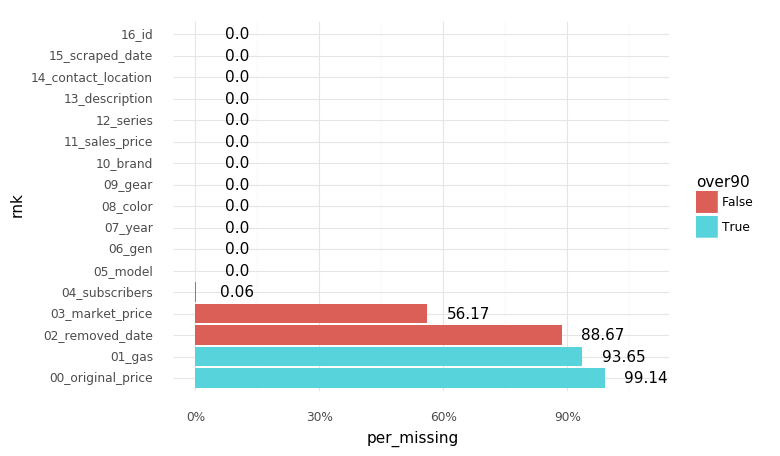

<ggplot: (8784549710740)>

In [3]:
g = (ggplot(missing,aes(x='rnk',y='per_missing',fill='over90')) + #base plot
     geom_col() + #type of plot 
     geom_text(aes(x='rnk',y='per_missing+0.1',label='round(100*per_missing,2)')) +#annotate
     scale_y_continuous(labels=percent_format()) + #y-axis tick
     theme_minimal() + coord_flip()#theme and flipping plot
    )
g

In [4]:
df.drop(missing[missing.over90==1].col_name,1,inplace=True)
df.head()

,id,brand,series,model,gen,year,color,gear,sales_price,market_price,description,contact_location,subscribers,scraped_date,removed_date
0,2210000,HONDA,JAZZ,1.5 i-VTEC SV (AS),ปี08-13,2014.0,สีขาว,เกียร์ออโต้,488000.0,NaN,"เครดิตดีออกรถ10,000จบครับ\nรับประกันเครื่องเกี...",กรุงเทพฯ,1047.0,2019-05-22,NaN
1,2210001,TOYOTA,ESTIMA,2.4 G HYBRID,ปี10-ปัจจุบัน,2013.0,สีขาว,เกียร์ออโต้,1677000.0,3050000.0,TOPสุด Estima Aeras Hybrid รถเข้าเซอร์วิส TOYO...,กรุงเทพฯ,182.0,2019-05-22,NaN
2,2210009,HONDA,JAZZ,1.5 i-VTEC V (AS),ปี08-13,2008.0,สีน้ำเงิน,เกียร์ออโต้,338000.0,NaN,"เครดิดีออกรถ10,000จบครับ\nรับประกันเครื่องเกีย...",กรุงเทพฯ,1047.0,2019-05-22,NaN
3,2210012,FORD,RANGER,2.2 WILDTRAK DBL CAB HI-RIDER,DOUBLECAB,2016.0,สีขาว,เกียร์ออโต้,689000.0,849000.0,รับรองสภาพ ไม่มีชน มือเดียว พาช่างมาตรวจสภาพรถ...,กรุงเทพฯ,760.0,2019-05-22,NaN
4,2210016,TOYOTA,SOLUNA,VIOS 1.5 E (ABS+AB),VIOS ปี13-ปัจจุบัน,2015.0,สีบรอนซ์เงิน,เกียร์ออโต้,359000.0,649000.0,"ไมล์แท้ 99,xxx TOYOTA SOLUNA VIOS 1.5E\nTOYOTA...",กรุงเทพฯ,699.0,2019-05-22,NaN


## Categorical Variables

In [5]:
cat_vars = ['brand','series','gen','color','gear','contact_location']
cat_df = df[cat_vars].copy()
cat_df.head()

,brand,series,gen,color,gear,contact_location
0,HONDA,JAZZ,ปี08-13,สีขาว,เกียร์ออโต้,กรุงเทพฯ
1,TOYOTA,ESTIMA,ปี10-ปัจจุบัน,สีขาว,เกียร์ออโต้,กรุงเทพฯ
2,HONDA,JAZZ,ปี08-13,สีน้ำเงิน,เกียร์ออโต้,กรุงเทพฯ
3,FORD,RANGER,DOUBLECAB,สีขาว,เกียร์ออโต้,กรุงเทพฯ
4,TOYOTA,SOLUNA,VIOS ปี13-ปัจจุบัน,สีบรอนซ์เงิน,เกียร์ออโต้,กรุงเทพฯ


In [6]:
#otherify popular values; you can (should?) also have a mapping dict
for col in cat_vars: cat_df = utils.otherify(cat_df,col)

In [7]:
interact(utils.value_dist, df =fixed(cat_df),
         col = widgets.Dropdown(options=list(cat_df.columns),value='brand'))

interactive(children=(Dropdown(description='col', options=('brand', 'series', 'gen', 'color', 'gear', 'contact…

<function utils.value_dist(df, col)>

In [8]:
def cat_plot(df,col):
    pass
#input dataframe and column
#output histogram plot of value distribution

interact(utils.cat_plot, df=fixed(cat_df),
         col = widgets.Dropdown(options=list(cat_df.columns),value='brand'))

interactive(children=(Dropdown(description='col', options=('brand', 'series', 'gen', 'color', 'gear', 'contact…

<function utils.cat_plot(df, col)>

In [9]:
#excluding others
def cat_plot_noothers(df,col):
    x = df.copy()
    x = x[x[col]!='others']
    return utils.cat_plot(x,col)

interact(cat_plot_noothers, df=fixed(cat_df),
         col = widgets.Dropdown(options=list(cat_df.columns),value='gen'))

interactive(children=(Dropdown(description='col', index=2, options=('brand', 'series', 'gen', 'color', 'gear',…

<function __main__.cat_plot_noothers(df, col)>

In [10]:
#relationship between dependent variable and categorical variable
cat_df['sales_price'] = utils.boxcox(df['sales_price'])
cat_df.head()

,brand,series,gen,color,gear,contact_location,sales_price
0,HONDA,others,ปี08-13,สีขาว,เกียร์ออโต้,กรุงเทพฯ,13.056226
1,TOYOTA,others,others,สีขาว,เกียร์ออโต้,กรุงเทพฯ,14.320520
2,HONDA,others,ปี08-13,others,เกียร์ออโต้,กรุงเทพฯ,12.669810
3,FORD,others,others,สีขาว,เกียร์ออโต้,กรุงเทพฯ,13.413541
4,TOYOTA,SOLUNA,others,สีบรอนซ์เงิน,เกียร์ออโต้,กรุงเทพฯ,12.733758


In [11]:
#relationship between sales price and color
cat_df.groupby('color').sales_price.describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
others,1756.0,12.568359,1.019319,0.000000,12.072547,12.542548,13.028055,16.905644
สีขาว,4207.0,13.085453,0.940839,0.000000,12.672950,13.005832,13.498058,16.438729
สีดำ,2848.0,13.071142,0.913027,0.000000,12.594734,13.014780,13.535466,16.111071
สีน้ำตาล,607.0,12.660002,0.814474,8.853808,12.144203,12.782689,13.140205,15.635210
สีบรอนซ์เงิน,1879.0,12.760100,0.923268,0.000000,12.421188,12.779876,13.151924,15.854130
สีเทา,2740.0,12.786451,0.957211,0.000000,12.421188,12.818555,13.188621,17.822480


In [12]:
def depcat_plot(df,col):
    pass
#plot the summary above

In [13]:
interact(utils.depcat_plot, 
         df=fixed(cat_df),
         dep=fixed('sales_price'),
         geom=fixed(geom_boxplot()), #geom_violin, geom_jitter
         cat= widgets.Dropdown(options=list(cat_df.columns)[:-1],value='gen'))

interactive(children=(Dropdown(description='cat', index=2, options=('brand', 'series', 'gen', 'color', 'gear',…

<function utils.depcat_plot(df, dep, cat, no_outliers=True, geom=<plotnine.geoms.geom_boxplot.geom_boxplot object at 0x7fd5014df828>)>

/home/charin/anaconda3/envs/drlnd/lib/python3.6/site-packages/plotnine/stats/stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/home/charin/anaconda3/envs/drlnd/lib/python3.6/site-packages/plotnine/utils.py:633: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)


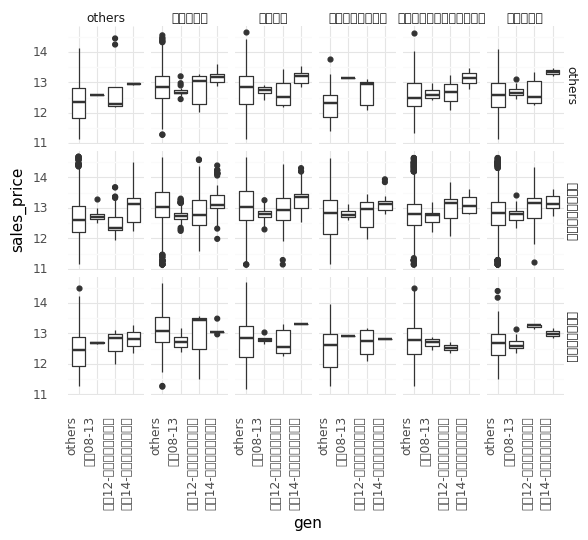

<ggplot: (8784520295979)>

In [20]:
#getting fancy; not necessarily the best idea
new_df = utils.remove_outliers(cat_df,'sales_price')
g = (ggplot(new_df, aes(x='gen',y='sales_price')) +
     geom_boxplot() + theme_minimal() +
     facet_grid('contact_location~color') +
     theme(axis_text_x = element_text(angle = 90, hjust = 1))
    )
g

## Numerical Variables

In [ ]:
import datetime
now = datetime.datetime.now()
df['nb_year'] = now.year - df['year']
num_vars = ['nb_year','sales_price','market_price','subscribers']
num_df = df[num_vars].dropna() #this is why you need to deal with missing values BEFORE exploration
num_df.describe()

In [ ]:
import seaborn as sns
sns.pairplot(num_df) #non-normal data is a problem!

**Q-Q plot** compares two probability distributions by plotting their quantiles against each other. We can use this to determine the normality of a variable by plotting the sample quantiles (from the data we have) against its theoretical quantiles (where the quantiles would be if the variable is normally distributed).

In [ ]:
interact(utils.qq_plot, df=fixed(num_df),
         col=widgets.Dropdown(options=list(num_df.columns)))

**Box-Cox transformation** is a statistical technique used to make data look like more normally distributed.

\begin{align}
g_\lambda(y) = \left\{
\begin{array}{lr}\displaystyle\frac{y^\lambda - 1}{\lambda} &  \lambda \neq 0\\
        & \\
       \log(y) &  \lambda = 0
     \end{array}
   \right.
\end{align}

In [ ]:
def boxcox(ser,lamb=0):
    pass
#input a column from pandas dataframe
#output transformed column

In [ ]:
#see transformation results
def what_lamb(df,col,lamb):
    sample_df = df.copy()
    former_g = utils.qq_plot(sample_df,col)
    sample_df[col] = utils.boxcox(sample_df[col],lamb)
    print(utils.qq_plot(sample_df,col),former_g)
    
interact(what_lamb, df=fixed(num_df),
         col=widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         lamb=widgets.FloatSlider(min=-3,max=3,step=0.5,value=0)
         )

We can also automate finding $\lambda$ by plotting the coefficient of the Q-Q plot, and choose lambda where the coefficient is closest to 1.

In [ ]:
lamb_df = utils.boxcox_lamb_df(num_df.subscribers)
interact(utils.boxcox_plot, df=fixed(num_df),
         col=widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         ls=fixed([i/10 for i in range(-30,31,5)])
         )

In [ ]:
#transform sales and market prices
for col in ['sales_price','market_price']:
    num_df['new_'+col] = utils.boxcox(num_df[col], utils.boxcox_lamb(num_df[col]))

In [ ]:
sns.pairplot(num_df[['nb_year','new_sales_price','new_market_price','subscribers']]) #a little better!

In case there are too many pairs, you might want to look at their distributions and correlations pair-by-pair.

In [ ]:
num_m = num_df.melt()
num_m.head()

In [ ]:
g = (ggplot(num_m,aes(x='value',fill='variable')) +
     geom_bar(stat='bin', bins=30) +
     facet_wrap('~variable', scales='free',ncol=2) + #facetting by variable
     theme_minimal()
    )
g

In [ ]:
interact(utils.jointplot, df=fixed(num_df),
         col_x= widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         col_y=widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         kind=widgets.Dropdown(options=['scatter','resid','reg','hex','kde','point'],value='scatter'))

In [ ]:
#correlation plot if you must; but it's just ONE number for the relationship
num_df.corr(method='pearson').style.background_gradient(cmap='coolwarm') 

In [ ]:
def pearson_corr(x,y):
    sub_x = x - x.mean()
    sub_y = y - y.mean()
    return (sub_x * sub_y).sum() / np.sqrt((sub_x**2).sum() * (sub_y**2).sum())

#spearman and kendall: pearson with rank variables
pearson_corr(df.nb_year,df.sales_price)

**Bottom line**: It's always better to LOOK at your data instead of relying on ONE number for each relationship.